# Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
Please cite: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
#Logistic Regression
# Import data
data = pd.read_csv(r'C:\Users\dell\Desktop\php0iVrYT.csv')

In [4]:
data['Class'].value_counts()

1    570
2    178
Name: Class, dtype: int64

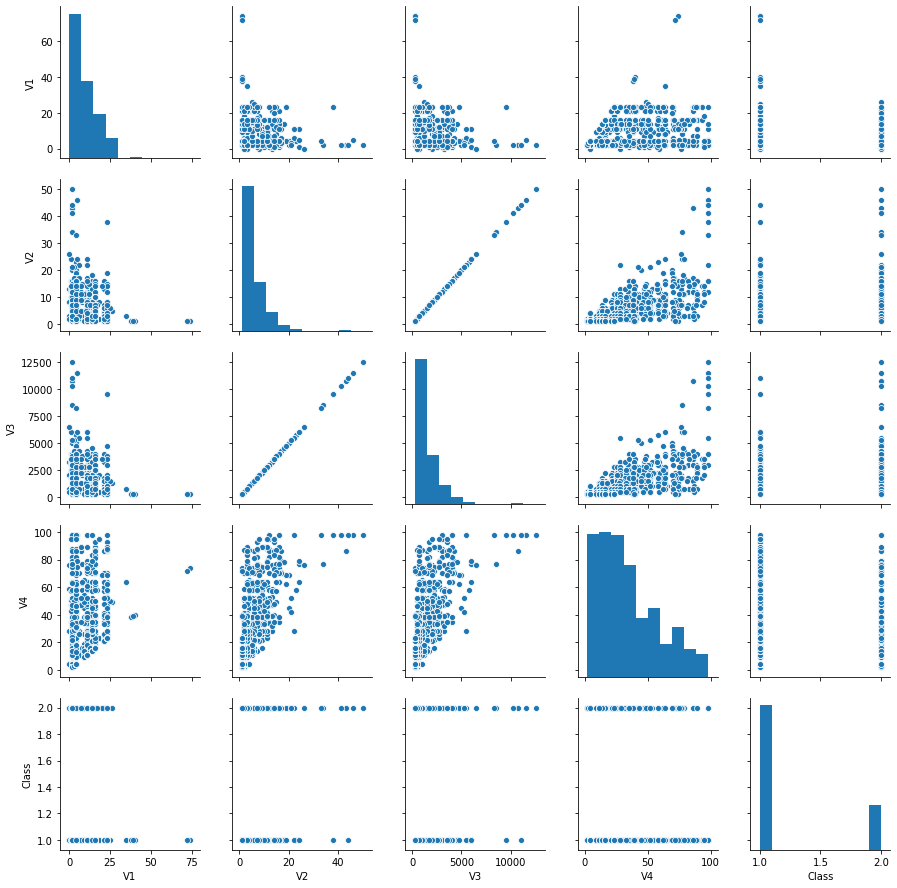

In [5]:
sns.pairplot(data)

In [6]:
# Now seperate the dependant and inpedepandant variable before proceeding

X = data.iloc[:,:-1]
Y = data.iloc[:, -1]

In [7]:
X

,V1,V2,V3,V4
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [8]:
Y

0      2
1      2
2      2
3      2
4      1
      ..
743    1
744    1
745    1
746    1
747    1
Name: Class, Length: 748, dtype: int64

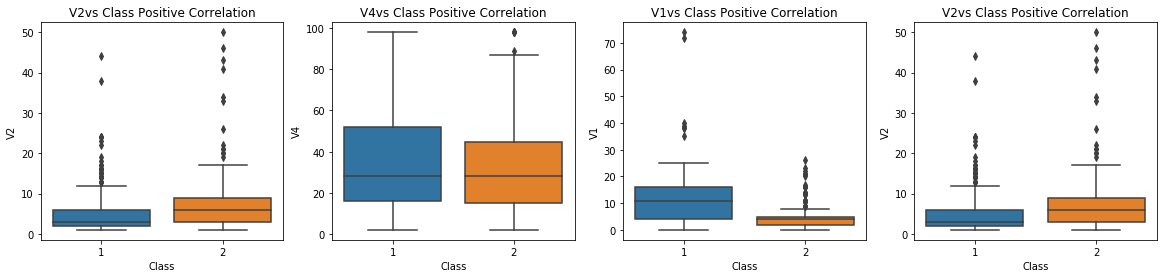

In [57]:
pos= ['V2','V4','V1','V2']

f, axes = plt.subplots(ncols=len(pos), figsize=(20,4))
for i,j in enumerate(pos):
# Postive Correlations with our Class (The higher our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=j, data=data, ax=axes[i])
    axes[i].set_title(j+'vs Class Positive Correlation')

In [10]:
data['Class']=data['Class'].astype('category')

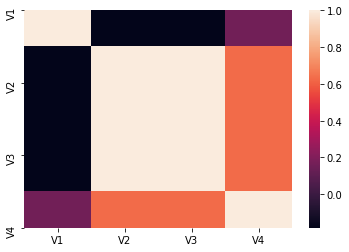

In [11]:
#3. Heatplot to visualise correlation

sns.heatmap(data.corr())

In [12]:
## spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)

In [13]:
##Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.74


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[107,   3],
       [ 36,   4]], dtype=int64)

# Decision Tree: 

In the following sections, we'll:

clean and prepare the data,
build a decision tree with default hyperparameters,
understand all the hyperparameters that we can tune, and finally
choose the optimal hyperparameters using grid search cross-validation.

In [20]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, except for max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           1       0.76      0.95      0.84       110
           2       0.54      0.17      0.26        40

    accuracy                           0.74       150
   macro avg       0.65      0.56      0.55       150
weighted avg       0.70      0.74      0.69       150



In [31]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(data.columns[:-1])
features

['V1', 'V2', 'V3', 'V4']

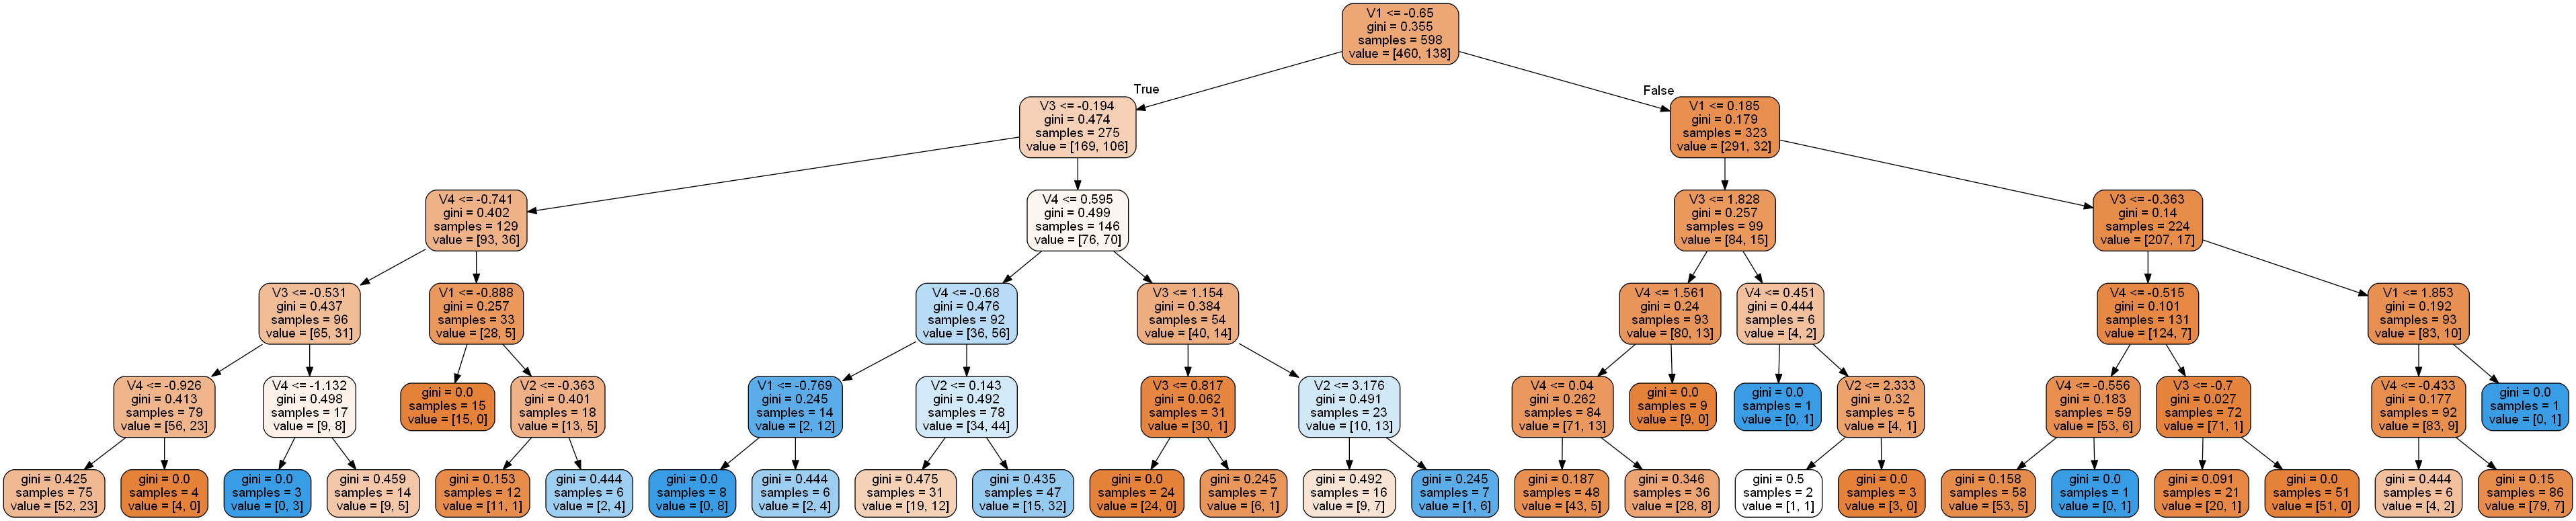

In [32]:
# plotting tree with max_depth=3 (explain this)
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Hyperparameter Tuning
The default tree is quite complex, and we need to simplify it by tuning the hyperparameters.

First, let's understand the parameters in a decision tree. You can read this in the documentation using help(DecisionTreeClassifier).

criterion (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.
max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.


In [33]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [36]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.7333333333333333


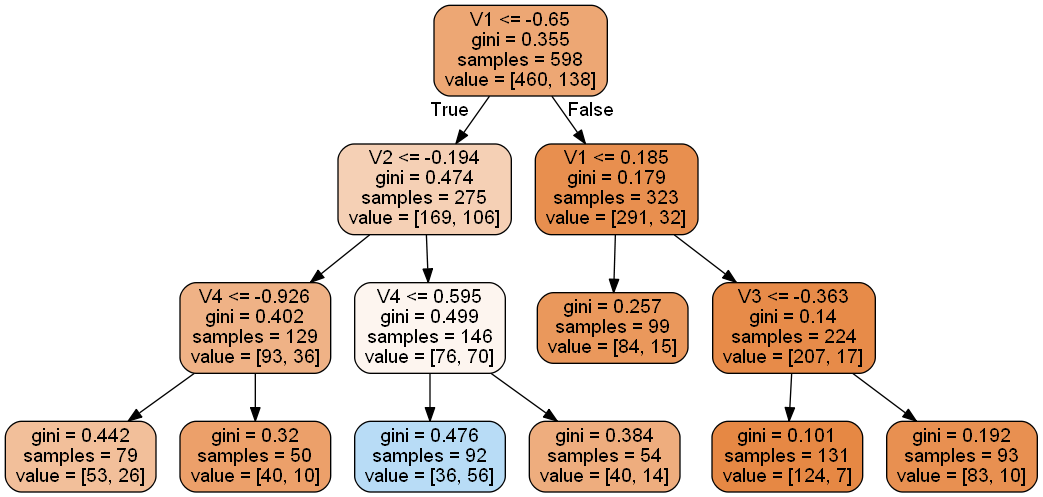

In [37]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [39]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84       110
           2       0.50      0.20      0.29        40

    accuracy                           0.73       150
   macro avg       0.63      0.56      0.56       150
weighted avg       0.69      0.73      0.69       150



# Fitting all models

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Fitting the models and calculating test and training score
classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier()
}

import warnings
warnings.filterwarnings('ignore')
for key,values in classifier.items():
    values.fit(X_train,y_train)
    training_score= cross_val_score(values,X_train,y_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X_train,y_train, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X_test,y_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X_test, y_test, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 78.93
Roc_Auc training score for Logistic Regression is 57.14: 
Test accuracy score of Logistic Regression is 73.33
Roc_Auc test score for Logistic Regression is 53.18: 
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 76.58
Roc_Auc training score for KNN is 61.45: 
Test accuracy score of KNN is 66.67
Roc_Auc test score for KNN is 52.61: 
------------------------------------------------------------------------------------------
Training accuracy score of SVC is 78.6
Roc_Auc training score for SVC is 57.68: 
Test accuracy score of SVC is 72.67
Roc_Auc test score for SVC is 49.55: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 74.41
Roc_Auc training score for DecisionTree is 59.6: 
Test accuracy score of DecisionTree is 60.0
Roc_Auc test score for DecisionTree is 53.52: 
------

In [43]:
#Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}


classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier()
}

def grid_search(classifier,Param):
    grid_log_reg = GridSearchCV(classifier,param_grid=Param)
    grid_log_reg.fit(X_train, y_train)
    best_param = grid_log_reg.best_estimator_
    print('{} algorithm best parameter are : {}'.format(classifier.__class__.__name__,best_param))



grid_search(LogisticRegression(),log_reg_params)

LogisticRegression algorithm best parameter are : LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


# Models comparison with ROC curves

In [54]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr,pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr,pos_label=1)

# SVM with rbf
modelSVMrbf=svm.SVC(kernel='rbf', probability=True)
modelSVMrbf.fit(X_train,y_train)
y_pred_prob_SVMrbf = modelSVMrbf.predict_proba(X_test)[:,1]
fpr_SVMrbf, tpr_SVMrbf, thresholds_SVMrbf = roc_curve(y_test, y_pred_prob_SVMrbf,pos_label=1)
roc_auc_SVMrbf = auc(fpr_SVMrbf, tpr_SVMrbf)
precision_SVMrbf, recall_SVMrbf, th_SVMrbf = precision_recall_curve(y_test, y_pred_prob_SVMrbf,pos_label=1)

# SVM with linear
modelSVMlinear=svm.SVC(kernel='linear', probability=True)
modelSVMlinear.fit(X_train,y_train)
y_pred_prob_SVMlinear = modelSVMlinear.predict_proba(X_test)[:,1]
fpr_SVMlinear, tpr_SVMlinear, thresholds_SVMlinear = roc_curve(y_test, y_pred_prob_SVMlinear,pos_label=1)
roc_auc_SVMlinear = auc(fpr_SVMlinear, tpr_SVMlinear)
precision_SVMlinear, recall_SVMlinear, th_SVMlinear = precision_recall_curve(y_test, y_pred_prob_SVMlinear,pos_label=1)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)
y_pred_prob_KNN = modelKNN.predict_proba(X_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN,pos_label=1)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN,pos_label=1)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(X_train,y_train)
y_pred_prob_Tree = modelTree.predict_proba(X_test)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree,pos_label=1)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(y_test, y_pred_prob_Tree,pos_label=1)

# Random forest
modelRF= RandomForestClassifier(n_estimators=100,random_state=0)
modelRF.fit(X_train,y_train)
y_pred_prob_rf = modelRF.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf,pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
precision_rf, recall_rf, th_rf = precision_recall_curve(y_test, y_pred_prob_rf,pos_label=1)


# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(X_train,y_train)
y_pred_prob_nb = modelNB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb,pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb,pos_label=1)

NameError: name 'fpr_en' is not defined

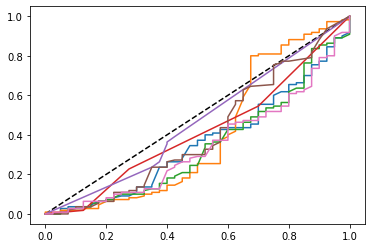

In [55]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_en, tpr_en, label='Ensamble (area = %0.3f)' % roc_auc_en)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()